In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
scores_rel = pd.read_csv('ml-20m/genome-scores.csv')
scores_rel
#scores_rel.tail(10)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
...,...,...,...
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450


In [3]:
tag_id = pd.read_csv('ml-20m/genome-tags.csv')
tag_id

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [4]:
tags = pd.read_csv('ml-20m/tags.csv')
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [5]:
links = pd.read_csv('ml-20m/links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [6]:
movies = pd.read_csv('ml-20m/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [7]:
ratings = pd.read_csv('ml-20m/ratings.csv')
ratings.dropna()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [17]:
movie_avg_rating = ratings.groupby('movieId')['rating'].mean()
movie_avg_rating

movieId
1         3.921240
2         3.211977
3         3.151040
4         2.861393
5         3.064592
            ...   
131254    4.000000
131256    4.000000
131258    2.500000
131260    3.000000
131262    4.000000
Name: rating, Length: 26744, dtype: float64

In [116]:
movie_avg_rating[58559]

4.220129171151776

In [47]:
hash_genre_movie = {}
for idx, x in enumerate(movies['movieId']):
    #print("{}, {}, {}".format(idx, x, movies.iloc[idx]['genres']))
    hash_genre_movie[x] = movies.iloc[idx]['genres']
    
hash_genre_movie    

{1: 'Adventure|Animation|Children|Comedy|Fantasy',
 2: 'Adventure|Children|Fantasy',
 3: 'Comedy|Romance',
 4: 'Comedy|Drama|Romance',
 5: 'Comedy',
 6: 'Action|Crime|Thriller',
 7: 'Comedy|Romance',
 8: 'Adventure|Children',
 9: 'Action',
 10: 'Action|Adventure|Thriller',
 11: 'Comedy|Drama|Romance',
 12: 'Comedy|Horror',
 13: 'Adventure|Animation|Children',
 14: 'Drama',
 15: 'Action|Adventure|Romance',
 16: 'Crime|Drama',
 17: 'Drama|Romance',
 18: 'Comedy',
 19: 'Comedy',
 20: 'Action|Comedy|Crime|Drama|Thriller',
 21: 'Comedy|Crime|Thriller',
 22: 'Crime|Drama|Horror|Mystery|Thriller',
 23: 'Action|Crime|Thriller',
 24: 'Drama|Sci-Fi',
 25: 'Drama|Romance',
 26: 'Drama',
 27: 'Children|Drama',
 28: 'Drama|Romance',
 29: 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
 30: 'Crime|Drama',
 31: 'Drama',
 32: 'Mystery|Sci-Fi|Thriller',
 33: 'Adventure|Romance|IMAX',
 34: 'Children|Drama',
 35: 'Drama|Romance',
 36: 'Crime|Drama',
 37: 'Documentary|IMAX',
 38: 'Children|Comedy',
 39: 'Comedy

In [76]:
hash_genre_movie[32773]

'Comedy'

In [48]:
genre_set_each_row = list(movies['genres'])

list_all_genre = []
for x in genre_set_each_row:
    for y in x.split('|'):
        list_all_genre.append(y)
list_all_genre = list(set(list_all_genre))
list_all_genre

['Crime',
 'Children',
 'Action',
 'IMAX',
 'Mystery',
 'Adventure',
 'Horror',
 'Thriller',
 'Romance',
 'Animation',
 'Sci-Fi',
 '(no genres listed)',
 'War',
 'Documentary',
 'Film-Noir',
 'Western',
 'Musical',
 'Fantasy',
 'Comedy',
 'Drama']

In [78]:
32773 in movie_avg_rating

False

In [91]:
hash_id_to_movie_name = {}
for idx, x in enumerate(movies['movieId']):
    hash_id_to_movie_name[x] = movies.iloc[idx]['title']
hash_id_to_movie_name

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [133]:
def FindMostPopularMovie(genre, hash_genre_movie, movie_avg_rating, hash_id_to_movie_name):
    candidate_list = []
    max_cand = 0
    max_value = -1
    for k, v in hash_genre_movie.items():
        #print("{}, {}".format(k, v))
        for genre_str in v.split('|'):
            #print("{}".format(genre_str))
            if(genre == genre_str):
                candidate_list.append(k)
    for cand in candidate_list:
        #print("cand = {}".format(cand))
        if(cand in movie_avg_rating):
            if(movie_avg_rating[cand] > max_value):
                max_cand = cand
                max_value = movie_avg_rating[cand]
       
    #print("max_cand = {}, {}, max_value = {}".format(max_cand, hash_id_to_movie_name[max_cand], max_value))
    return(hash_id_to_movie_name[max_cand], max_value, max_cand)

In [134]:
FindMostPopularMovie('Comedy', hash_genre_movie, movie_avg_rating, hash_id_to_movie_name)

('Foster Brothers, The (Süt kardesler) (1976)', 5.0, 86055)

In [113]:
movies[movies.title=='Dark Knight, The (2008)']

,movieId,title,genres
12525,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [115]:
ratings[ratings.movieId==58559]

,userId,movieId,rating,timestamp
1418,11,58559,5.0,1230920279
3707,31,58559,5.0,1424733470
4507,42,58559,4.5,1411667706
4971,49,58559,4.0,1367549322
7088,60,58559,3.0,1339652457
...,...,...,...,...
19997514,138472,58559,4.5,1217262756
19997697,138473,58559,5.0,1274233335
19999316,138485,58559,5.0,1346728415
19999634,138489,58559,4.0,1352989309


In [114]:
hash_id_to_movie_name[58559]

'Dark Knight, The (2008)'

In [98]:
hash_genre_count = {}
for x in list_all_genre:
    hash_genre_count[x] = 0
    
total_len = len(ratings['movieId'])
print("total_len = {}".format(total_len))

for idx, x in enumerate(ratings['movieId'].iloc[::]):
    #print("----------------------")
    #print("{}".format(x))
    for y in hash_genre_movie[x].split('|'):
        #print("y = {}".format(y))
        hash_genre_count[y]+=1

total_len = 20000263


In [99]:
hash_genre_count

{'Crime': 3298335,
 'Children': 1669249,
 'Action': 5614208,
 'IMAX': 492366,
 'Mystery': 1557282,
 'Adventure': 4380351,
 'Horror': 1482737,
 'Thriller': 5313506,
 'Romance': 3802002,
 'Animation': 1140476,
 'Sci-Fi': 3150141,
 '(no genres listed)': 361,
 'War': 1048618,
 'Documentary': 244619,
 'Film-Noir': 216689,
 'Western': 423714,
 'Musical': 870915,
 'Fantasy': 2111403,
 'Comedy': 7502234,
 'Drama': 8857853}

In [100]:
hash_genre_count_sorted = {k: v for k, v in sorted(hash_genre_count.items(), key=lambda item: item[1])}
hash_genre_count_sorted

{'(no genres listed)': 361,
 'Film-Noir': 216689,
 'Documentary': 244619,
 'Western': 423714,
 'IMAX': 492366,
 'Musical': 870915,
 'War': 1048618,
 'Animation': 1140476,
 'Horror': 1482737,
 'Mystery': 1557282,
 'Children': 1669249,
 'Fantasy': 2111403,
 'Sci-Fi': 3150141,
 'Crime': 3298335,
 'Romance': 3802002,
 'Adventure': 4380351,
 'Thriller': 5313506,
 'Action': 5614208,
 'Comedy': 7502234,
 'Drama': 8857853}

In [105]:
FindMostPopularMovie('Drama', hash_genre_movie, movie_avg_rating, hash_id_to_movie_name)

max_cand = 26718, Life On A String (Bian chang Bian Zou) (1991), max_value = 5.0


('Life On A String (Bian chang Bian Zou) (1991)', 5.0)

In [135]:
hash_genre_movie_highest = {}
hash_genre_movie_id_highest = {}
hash_genre_rating_movie_highest = {}
for genre in list_all_genre:
    hash_genre_movie_highest[genre], hash_genre_rating_movie_highest[genre], hash_genre_movie_id_highest[genre] = FindMostPopularMovie(genre, hash_genre_movie, movie_avg_rating, hash_id_to_movie_name)

hash_genre_movie_highest

{'Crime': 'Little Criminals (1995)',
 'Children': 'Snow Queen, The (Lumikuningatar) (1986)',
 'Action': 'Shaolin Temple 2: Kids from Shaolin (Shao Lin xiao zi) (Kids from Shaolin) (1984)',
 'IMAX': 'Dark Knight, The (2008)',
 'Mystery': 'Loser Takes All! (Qui perd gagne !) (2003)',
 'Adventure': 'Life On A String (Bian chang Bian Zou) (1991)',
 'Horror': 'Dream Demon (1988)',
 'Thriller': 'Eye In The Sky (Gun chung) (2007)',
 'Romance': 'Boy Meets Boy (2008)',
 'Animation': 'Rock the Boat (1944)',
 'Sci-Fi': 'Mishen (Target) (2011)',
 '(no genres listed)': 'Ella Lola, a la Trilby (1898)',
 'War': 'Island at War (2004)',
 'Documentary': 'Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)',
 'Film-Noir': 'Here Without Me (Inja bedoone man) (2011)',
 'Western': 'Time to Die (Tiempo de morir) (1966)',
 'Musical': 'Life On A String (Bian chang Bian Zou) (1991)',
 'Fantasy': 'Life On A String (Bian chang Bian Zou) (1991)',
 'Comedy': 'Foster Brothers, The (Süt kardesle

In [136]:
hash_genre_movie_id_highest

{'Crime': 92956,
 'Children': 32230,
 'Action': 98761,
 'IMAX': 58559,
 'Mystery': 113043,
 'Adventure': 26718,
 'Horror': 102882,
 'Thriller': 100743,
 'Romance': 94949,
 'Animation': 118610,
 'Sci-Fi': 114214,
 '(no genres listed)': 94431,
 'War': 107252,
 'Documentary': 27914,
 'Film-Noir': 107643,
 'Western': 89313,
 'Musical': 26718,
 'Fantasy': 26718,
 'Comedy': 86055,
 'Drama': 26718}

In [111]:
hash_genre_rating_movie_highest

{'Crime': 5.0,
 'Children': 5.0,
 'Action': 5.0,
 'IMAX': 4.220129171151776,
 'Mystery': 5.0,
 'Adventure': 5.0,
 'Horror': 5.0,
 'Thriller': 5.0,
 'Romance': 5.0,
 'Animation': 5.0,
 'Sci-Fi': 5.0,
 '(no genres listed)': 5.0,
 'War': 5.0,
 'Documentary': 5.0,
 'Film-Noir': 4.75,
 'Western': 4.5,
 'Musical': 5.0,
 'Fantasy': 5.0,
 'Comedy': 5.0,
 'Drama': 5.0}

In [117]:
bins = [k for k,v in hash_genre_count_sorted.items()]
bins

['(no genres listed)',
 'Film-Noir',
 'Documentary',
 'Western',
 'IMAX',
 'Musical',
 'War',
 'Animation',
 'Horror',
 'Mystery',
 'Children',
 'Fantasy',
 'Sci-Fi',
 'Crime',
 'Romance',
 'Adventure',
 'Thriller',
 'Action',
 'Comedy',
 'Drama']

In [118]:
values1 = [hash_genre_movie_highest[x] for x in bins]
values1

['Ella Lola, a la Trilby (1898)',
 'Here Without Me (Inja bedoone man) (2011)',
 'Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)',
 'Time to Die (Tiempo de morir) (1966)',
 'Dark Knight, The (2008)',
 'Life On A String (Bian chang Bian Zou) (1991)',
 'Island at War (2004)',
 'Rock the Boat (1944)',
 'Dream Demon (1988)',
 'Loser Takes All! (Qui perd gagne !) (2003)',
 'Snow Queen, The (Lumikuningatar) (1986)',
 'Life On A String (Bian chang Bian Zou) (1991)',
 'Mishen (Target) (2011)',
 'Little Criminals (1995)',
 'Boy Meets Boy (2008)',
 'Life On A String (Bian chang Bian Zou) (1991)',
 'Eye In The Sky (Gun chung) (2007)',
 'Shaolin Temple 2: Kids from Shaolin (Shao Lin xiao zi) (Kids from Shaolin) (1984)',
 'Foster Brothers, The (Süt kardesler) (1976)',
 'Life On A String (Bian chang Bian Zou) (1991)']

In [165]:
values1_trunc = [(data[:25] + '..') if len(data) > 25 else data for data in values1]
values1_trunc

['Ella Lola, a la Trilby (1..',
 'Here Without Me (Inja bed..',
 'Hijacking Catastrophe: 9/..',
 'Time to Die (Tiempo de mo..',
 'Dark Knight, The (2008)',
 'Life On A String (Bian ch..',
 'Island at War (2004)',
 'Rock the Boat (1944)',
 'Dream Demon (1988)',
 'Loser Takes All! (Qui per..',
 'Snow Queen, The (Lumikuni..',
 'Life On A String (Bian ch..',
 'Mishen (Target) (2011)',
 'Little Criminals (1995)',
 'Boy Meets Boy (2008)',
 'Life On A String (Bian ch..',
 'Eye In The Sky (Gun chung..',
 'Shaolin Temple 2: Kids fr..',
 'Foster Brothers, The (Süt..',
 'Life On A String (Bian ch..']

In [166]:
values1_trunc_genre = []
for idx, x in enumerate(values1_trunc):
    values1_trunc_genre.append("({}){}".format(bins[idx], x))

values1_trunc_genre                      

['((no genres listed))Ella Lola, a la Trilby (1..',
 '(Film-Noir)Here Without Me (Inja bed..',
 '(Documentary)Hijacking Catastrophe: 9/..',
 '(Western)Time to Die (Tiempo de mo..',
 '(IMAX)Dark Knight, The (2008)',
 '(Musical)Life On A String (Bian ch..',
 '(War)Island at War (2004)',
 '(Animation)Rock the Boat (1944)',
 '(Horror)Dream Demon (1988)',
 '(Mystery)Loser Takes All! (Qui per..',
 '(Children)Snow Queen, The (Lumikuni..',
 '(Fantasy)Life On A String (Bian ch..',
 '(Sci-Fi)Mishen (Target) (2011)',
 '(Crime)Little Criminals (1995)',
 '(Romance)Boy Meets Boy (2008)',
 '(Adventure)Life On A String (Bian ch..',
 '(Thriller)Eye In The Sky (Gun chung..',
 '(Action)Shaolin Temple 2: Kids fr..',
 '(Comedy)Foster Brothers, The (Süt..',
 '(Drama)Life On A String (Bian ch..']

In [156]:
values2 = [hash_genre_rating_movie_highest[x] for x in bins]
values2

[5.0,
 4.75,
 5.0,
 4.5,
 4.220129171151776,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0]

In [143]:
values3 = [str(hash_genre_movie_id_highest[x]) for x in bins]
values3

['94431',
 '107643',
 '27914',
 '89313',
 '58559',
 '26718',
 '107252',
 '118610',
 '102882',
 '113043',
 '32230',
 '26718',
 '114214',
 '92956',
 '94949',
 '26718',
 '100743',
 '98761',
 '86055',
 '26718']

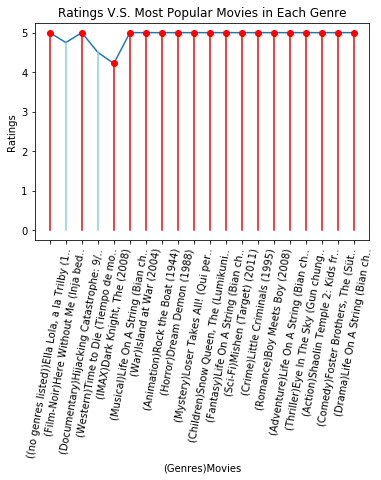

In [167]:
plt.title('Ratings V.S. Most Popular Movies in Each Genre')
plt.ylabel('Ratings')
plt.xlabel('(Genres)Movies')
plt.xticks(rotation=80)
line_plot = plt.plot(values1_trunc_genre, values2)

total_len = len(values2)
max_val = max(line_plot[0].get_ydata())
min_val = min(line_plot[0].get_ydata())
for idx, xdata in enumerate(line_plot[0].get_xdata()):
    #print("{}, {} -> {}".format(idx, xdata, line_plot[0].get_ydata()[idx]))
    #plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='skyblue')
    if(line_plot[0].get_ydata()[idx] == min_val or line_plot[0].get_ydata()[idx] == max_val):
#       plt.text(xdata, line_plot[0].get_ydata()[idx], '({x}, {y})'.format(x = xdata, y = line_plot[0].get_ydata()[idx]), ha='center', va='bottom', fontsize=10)
        plt.plot(xdata, line_plot[0].get_ydata()[idx], 'ro')
        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='red')
    #elif(idx == 1):
#        plt.text(xdata, line_plot[0].get_ydata()[idx]*2.2, '({x}, {y})'.format(x = xdata, y = line_plot[0].get_ydata()[idx]), ha='center', va='bottom', fontsize=10)
#        plt.plot(xdata, line_plot[0].get_ydata()[idx], 'ro')
#        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='red')
#    elif(idx == 2):
#        plt.text(xdata, line_plot[0].get_ydata()[idx]*4, '({x}, {y})'.format(x = xdata, y = line_plot[0].get_ydata()[idx]), ha='center', va='bottom', fontsize=10)
#        plt.plot(xdata, line_plot[0].get_ydata()[idx], 'ro')
#        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='red')   
#    elif(idx == total_len-2):
#        plt.text(xdata, line_plot[0].get_ydata()[idx], '({x}, {y})'.format(x = xdata, y = line_plot[0].get_ydata()[idx]), ha='center', va='bottom', fontsize=10)
#        plt.plot(xdata, line_plot[0].get_ydata()[idx], 'ro')
#        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='red')  
#    elif(idx == total_len-3):
#        plt.text(xdata, line_plot[0].get_ydata()[idx], '({x}, {y})'.format(x = xdata, y = line_plot[0].get_ydata()[idx]), ha='center', va='bottom', fontsize=10)
#        plt.plot(xdata, line_plot[0].get_ydata()[idx], 'ro')
#        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='red')        
    else:
        plt.plot([xdata, xdata], [0, line_plot[0].get_ydata()[idx]], c='skyblue')

In [148]:
for x in values3:
    print("{} : {}".format(x, hash_id_to_movie_name[int(x)]))

94431 : Ella Lola, a la Trilby (1898)
107643 : Here Without Me (Inja bedoone man) (2011)
27914 : Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire (2004)
89313 : Time to Die (Tiempo de morir) (1966)
58559 : Dark Knight, The (2008)
26718 : Life On A String (Bian chang Bian Zou) (1991)
107252 : Island at War (2004)
118610 : Rock the Boat (1944)
102882 : Dream Demon (1988)
113043 : Loser Takes All! (Qui perd gagne !) (2003)
32230 : Snow Queen, The (Lumikuningatar) (1986)
26718 : Life On A String (Bian chang Bian Zou) (1991)
114214 : Mishen (Target) (2011)
92956 : Little Criminals (1995)
94949 : Boy Meets Boy (2008)
26718 : Life On A String (Bian chang Bian Zou) (1991)
100743 : Eye In The Sky (Gun chung) (2007)
98761 : Shaolin Temple 2: Kids from Shaolin (Shao Lin xiao zi) (Kids from Shaolin) (1984)
86055 : Foster Brothers, The (Süt kardesler) (1976)
26718 : Life On A String (Bian chang Bian Zou) (1991)


In [147]:
hash_id_to_movie_name[94431]

'Ella Lola, a la Trilby (1898)'